# Sklearn: Apprentissage non-supervisé (Partie 2)

URL : https://youtu.be/FTtzd31IAOw?si=xcb7eU8fH2IrWjnB

In [3]:
#importations
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.ensemble import IsolationForest
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA

## Détection d’Anomalies

## Detection d'anomalies avec Isolation Forest

Un autre exemple d’application de l’apprentissage non-supervisé est la détection d’anomalies. En analysant la structure X des données, la machine est capable de trouver les échantillons dont les features sont très éloignées de celles des autres échantillons. Ces échantillons sont alors considérés comme étant des anomalies.

**Les algorithmes à connaitres :**

La détection d'anomalies contient 2 branches importantes: outlier detection et novelty detection:

- **IsolationForest:** Efficace pour détecter des outliers dans le train_set (**outlier detection**).
- **Local Outlier Factor:** Efficace pour détecter des anomalies futures (**novelty detection**).

**Applications :**

- Nettoyer un dataset des valeurs aberrantes qui le composent.
- Détecter un comportement anormal sur un site Internet ou sur une caméra de surveillance.
- Maintenance prédictive des machines d’une usine.

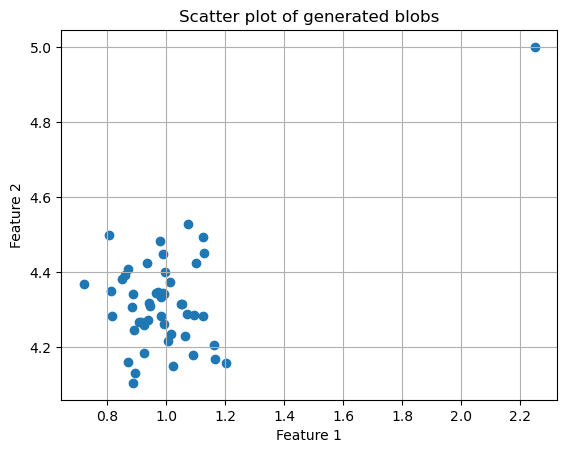

In [7]:
#générer des données de test sous la forme de blobs
#make_blobs(n_samples=50, centers=1, cluster_std=0.1, random_state=0):
#génère 50 échantillons répartis sur 1 centre
#cluster_std détermine la dispersion des points autour de chaque centre
#random_state=0: fixe la graine aléatoire du générateur de nombres aléatoires, ce qui assure la reproductibilité des résultats
#X contient les caractéristiques des échantillons
#y est l'étiquette du cluster (non utilisées ici) 
X, y = make_blobs(n_samples=50, centers=1, cluster_std=0.1, random_state=0)

#modifier le dernier point de données pour qu'il soit situé à (2.25, 5)
#le dernier point dans X est remplacé par les coordonnées [2.25, 5], ce qui va le déplacer en dehors du cluster
X[-1, :] = np.array([2.25, 5])

#tracer le nuage de points X[:, 1] en fonction de X[:, 0]
#X[:, 0] représente toutes les lignes de la 1ère colonne de X (feature 1)
#X[:, 1] représente toutes les lignes de la 2ème colonne de X (feature 2)
plt.scatter(X[:, 0], X[:, 1])  

plt.title("Scatter plot of generated blobs")  # ajouter un titre  
plt.xlabel("Feature 1")  #l'axe x (l'axe des abscisses)
plt.ylabel("Feature 2")  #l'axe y (l'axe des ordonnées)

#ajouter une grille pour faciliter la lecture
plt.grid(True)

Text(0, 0.5, 'Feature 2')

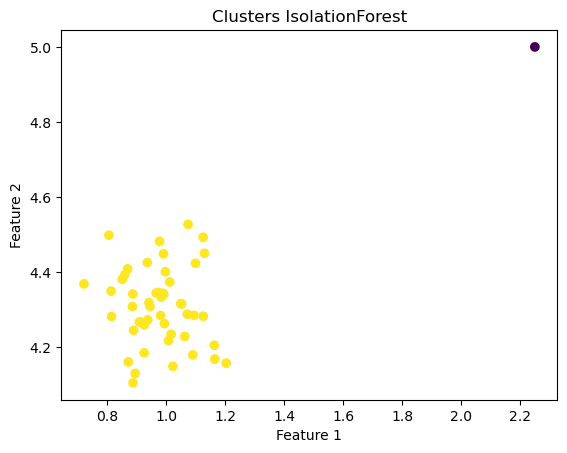

In [8]:
#définir model
#contamination=0.01: représente le taux de contamination qu'on désire filtrer dans le dataset
#ici on pense qu'il y a 1% de déchets
model = IsolationForest(contamination=0.01)

#entraîner le modèle sur les donées X
model.fit(X)

#enregistrer les prédictions dans la variable predictions
predictions = model.predict(X)

#tracer les points colorés selon le cluster auquel ils appartiennent
#les données X[:, 1] en fonction de X[:, 0]
#X[:, 0] représente toues les lignes de la 1ère colonne de X (feature 1)
#X[:, 1] représente toues les lignes de la 2ème colonne de X (feature 2)
#c=predictions: la couleur dépend des prédictions du modèle
plt.scatter(X[:, 0], X[:, 1], c=predictions)
plt.title('Clusters IsolationForest')       #titre du graph
plt.xlabel("Feature 1")                     #l'axe x (l'axe des abscisses)
plt.ylabel("Feature 2")                     #l'axe y (l'axe des ordonnées)

In [9]:
#l'anomalie est alors identifiée!

In [10]:
#prédire la position de chaque point basé sur le modèle ajusté
model.predict(X)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1])

In [11]:
# 1 signifie que c'est un cas normal du dataset
# -1 signifie que c'est une anomalie du dataset
# dans ce cas, le dernier point (de X) est une anomalie

**Application d'IsolationForest (digits):**

In [13]:
#charger le dataset digits en l'enregistrer dans la variable digits
digits = load_digits()

#idenfier images
images = digits.images

#identifier X (features)
X = digits.data

#identifier y (la target)
y = digits.target

In [14]:
#la forme de images
images.shape

(1797, 8, 8)

In [15]:
#la forme de X
X.shape

(1797, 64)

In [16]:
#1797: le dataset contient 1797 échantillons (càd images de chiffres allant de 0 à 9 qui sont écrits)
#64: ces chiffres sont écrits sur des images de 64 pixels, et ce sont des carrés

In [17]:
#la forme de y
y.shape

(1797,)

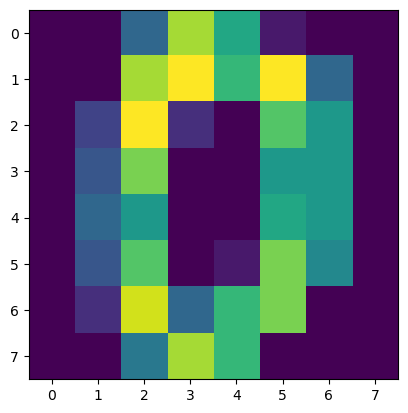

In [18]:
#afficher une image du dataset:
#images[0] avec matplotlib
plt.imshow(images[0])

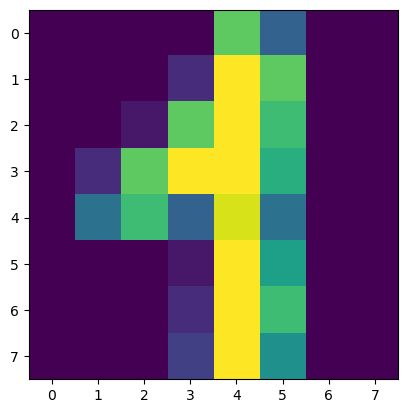

In [19]:
#afficher une autre image du dataset:
#images[0] avec matplotlib
plt.imshow(images[42])

In [20]:
# le chiffre 1 est écrit sur cette image

On va essayer de nettoyer ce dataset des images sur lesquelles les chiffres sont mal-écrits.

**Remarque:**

Le **taux de contamination** doit être faible, au **maximum 5%**. (Il n'est pas normal d'avoir un dataset qui a un taux de contamination élevé)

In [22]:
#identifier model
#random_state=0: fixe la graine aléatoire du générateur de nombres aléatoires, ce qui assure la reproductibilité des résultats
##contamination=0.02: représente le taux de contamination qu'on désire filtrer dans le dataset
#ici on pense qu'il y a 2% de déchets
model = IsolationForest(random_state=0, contamination=0.02)

#entraîner le modèle avec les données X
model.fit(X)

IsolationForest(contamination=0.02, random_state=0)

In [23]:
#les prédictions du modèle
model.predict(X)

array([1, 1, 1, ..., 1, 1, 1])

In [24]:
# 1 signifie que c'est un cas normal du dataset
# -1 signifie que c'est une anomalie du dataset

In [25]:
#on applique le boolean indexing pour filtrer

#créer la variable outliers
#elle comprend toutes les prédictions qui sont égales à -1
outliers = model.predict(X) == -1

#afficher outliers
outliers           #on obtient un masque

array([False, False, False, ..., False, False, False])

In [26]:
#on peut injecter ce masque dans X, y ou images

In [27]:
#injecter le masque dans images
images[outliers]

array([[[ 0.,  0.,  0., ..., 15.,  4.,  0.],
        [ 0.,  0.,  0., ..., 16., 12.,  0.],
        [ 0.,  0.,  0., ..., 16., 12.,  0.],
        ...,
        [ 0.,  9., 16., ...,  1.,  0.,  0.],
        [ 0.,  3.,  8., ...,  9.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16., 12.,  0.]],

       [[ 0.,  6., 16., ..., 15., 10.,  0.],
        [ 0.,  9., 16., ...,  6.,  5.,  0.],
        [ 0., 12., 16., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0.,  3., ...,  0.,  0.,  0.],
        [ 0.,  1.,  5., ...,  0.,  0.,  0.],
        [ 0.,  9., 16., ...,  0.,  0.,  0.]],

       [[ 0.,  4., 16., ..., 16.,  5.,  0.],
        [ 0., 11., 16., ...,  8.,  3.,  0.],
        [ 0., 10., 16., ...,  0.,  0.,  0.],
        ...,
        [ 0.,  0., 12., ...,  0.,  0.,  0.],
        [ 0.,  0.,  6., ...,  0.,  0.,  0.],
        [ 0.,  4., 16., ...,  0.,  0.,  0.]],

       ...,

       [[ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ...,  6.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.

In [28]:
#ici on a que les images qui sont des outliers

In [29]:
#afficher la 1ère de ces images
images[outliers][0]

array([[ 0.,  0.,  0.,  0., 11., 15.,  4.,  0.],
       [ 0.,  0.,  0.,  3., 16., 16., 12.,  0.],
       [ 0.,  0.,  0.,  8., 14., 16., 12.,  0.],
       [ 0.,  0.,  0.,  5., 10., 16.,  6.,  0.],
       [ 0.,  1.,  7., 11., 16., 13.,  0.,  0.],
       [ 0.,  9., 16., 16., 14.,  1.,  0.,  0.],
       [ 0.,  3.,  8., 14., 16.,  9.,  0.,  0.],
       [ 0.,  0.,  0.,  1., 11., 16., 12.,  0.]])

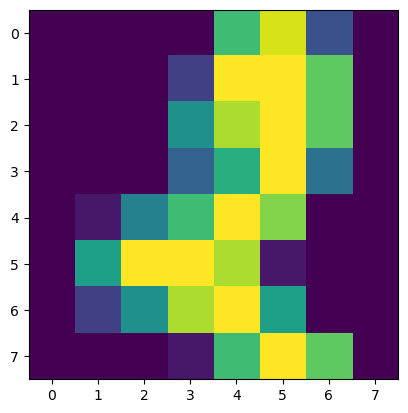

In [30]:
#afficher cette image avec matplotlib
plt.imshow(images[outliers][0])

In [31]:
#cette image représente une des anomalies du dataset. càd une image dont le chiffre est mal-écrit.

Text(0.5, 1.0, '2')

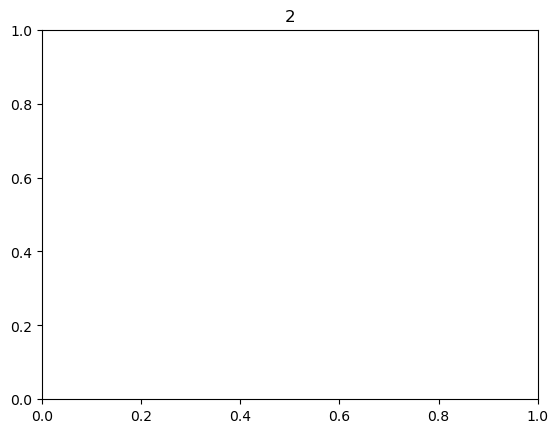

In [32]:
#pour voir quel chiffre est écrit dans l'image:
#plt.title() pour lui donner un titre, et comme titre on a:
#y[outliers][0]: càd filtrer y avec que les outliers et prendre le 1er outlier
plt.title(y[outliers][0])

In [33]:
#le chiffre écrit sur l'image est: 2

**Remarque: le cas de Local Outlier Factor**

Il est conseillé de jeter un coup d'œil à Local Outlier Factor, qui est un algorithme qui repose sur la méthode des voisins les plus proches et permet de faire la **novelty detection**: càd qu'on demande à la machine d'analyser les données X, **pour trouver des anomalies dans le test set**, càd dans les données futures.

**Isolation Forest** est lui utilisé pour trouver des **anomalies dans le train set**.

## PCA : Reduction de dimension

Le principe est de réduire la complexité superflue d'un dataset en projetant ses données dans un espace de plus petite dimension (càd un espace avec moins de variables).

Le but est:
- Accélérer l'apprentissage de la machine.
- Lutter contre un phénomène appelé **le fléau de la dimension** (risque d'overfitting lié au surplus de dimensions).

Pour ça, un des algorithmes les plus populaires: **l'analyse en composante principale (PCA)**.

### Analyse en composante principale (PCA)

Son principe est de projeter les données sur des axes appelés **composantes principales**, en cherchant à minimiser la distance entre les points et leurs projections.

De cette manière, **on déduit la dimension du dataset tout en préservant au maximum la variance des données.**

=> **Le plus important dans PCA:** est de préserver au maximum la variance des données pour obtenir la projection qui soit la plus fidèle possible aux données fournies.

- **D'un point de vue mathématique:**

Pour trouver les axes de projections:
1. On calcule **la matrice de covariance** des données.
2. On détermine **les vecteurs propres** de cette matrice: ce sont **les composantes principales**.
3. On projette les données sur ces axes.

- **PCA est un transformer:**

Il suffit d'appliquer ces 2 étapes:
1. On définit le nombre de composantes: càd qu'on précise le nombre de dimensions sur lesquelles on désire projeter les données.
2. On transforme les données avec fit_transform().

- **Comment choisir le nombre de composantes sur lesquelles on va projeter les données?**

Il y a 2 cas possibles:

**1er cas: Visualisation des données**

Si on cherche à visualiser les données dans un espace de 2D ou 3D, alors n_components= 2 ou 3.

**2ème cas: Compression des données:**

Réduire au maximum la taille du dataset tout en **conservant 95-99% de la variance des données**, si on veut compresser les données pour accélerer l'apprentissage de la machine, pour des tâches de classification ou de régression. (pcq plus on réduit la dimension d'un dataset, plus on perd en qualité, càd en variance)

Le but est de réduire la dimension d'un dataset tout en minimisant la perte de qualité, c'est pourquoi il est conseillé de choisir le nombre de composantes de telle sorte à garder 95 à 99% de la variance originelle des données.

### Visualisation des données

On va voir dans ce cas comment projeter le dataset digits, qui a 64 dimensions (64 variables), puis le visualiser en 2 dimensions.

In [40]:
#la forme de X
X.shape

(1797, 64)

In [41]:
#1797: le dataset contient 1797 échantillons (càd images de chiffres allant de 0 à 9 qui sont écrits)
#64: (64 dimensions) ces chiffres sont écrits sur des images de 64 pixels, et ce sont des carrés

In [42]:
#y contient les étiquettes des échantillons de X (allant de 0 jusqu'à 9)

#la forme de y
y.shape

(1797,)

In [43]:
#créer le modèle PCA
#n_components=2: on cherche à visualiser les données dans un espace de 2D
model = PCA(n_components=2)

#entraîner le modèle sur les données X
#la métode fit_transform combine la méthode fit() et la méthode transform()
model.fit_transform(X)

#enregistrer les données X transformées dans la variable X_reduced
X_pca = model.fit_transform(X)

In [44]:
#la forme de X_pca
X_pca.shape

(1797, 2)

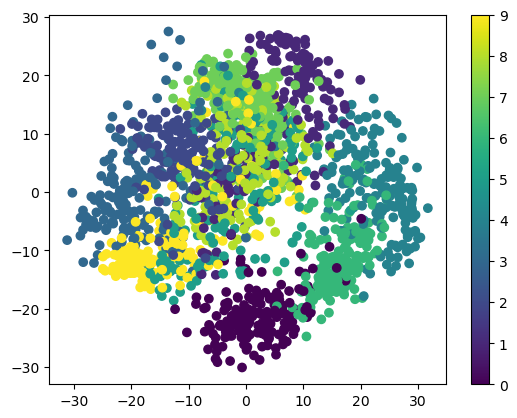

In [45]:
#tracer le nuage de points X_pca[:,1] en fonction de X_pca[:,0]
#X_pca[:, 0] représente toues les lignes de Feature 1 de X_pca
#X_pca[:, 1] représente toues les lignes de Feature 2 de X_pca
#c=y: la couleur dépend de y
plt.scatter(X_pca[:,0], X_pca[:,1], c=y)

plt.colorbar()    #ajouter une barre de couleurs pour faciliter la lecture du graphique

Le graphique montre comment sont organisées les échantillons du dataset digits dans un espace de 2D.

Pour savoir comment sont organisées les axes du graphiques (axe des abscisses et des ordonées), on analyse le contenu de chaque composante:

In [47]:
model.components_

array([[ 0.00000000e+00, -1.73094651e-02, -2.23428835e-01,
        -1.35913304e-01, -3.30323092e-02, -9.66340844e-02,
        -8.32943805e-03,  2.26900082e-03, -3.20516495e-04,
        -1.19308905e-01, -2.44451676e-01,  1.48512745e-01,
        -4.67319410e-02, -2.17740744e-01, -1.48136776e-02,
         4.47779518e-03, -4.94136398e-05, -7.95419375e-02,
         8.33951454e-02,  2.15915342e-01, -1.72126801e-01,
        -1.63712098e-01,  2.86444452e-02,  4.23251803e-03,
         9.85488574e-05,  6.42319144e-02,  2.54093316e-01,
        -3.56771026e-02, -2.09462569e-01, -4.31311420e-02,
         5.13118688e-02,  2.13422732e-04,  0.00000000e+00,
         1.59950883e-01,  3.68690774e-01,  1.64406827e-01,
         8.52007908e-02,  3.72982855e-02,  2.15866980e-02,
         0.00000000e+00,  1.28865585e-03,  1.06945287e-01,
         3.03067457e-01,  2.47813041e-01,  2.09637296e-01,
         1.22325219e-02, -3.69458497e-02,  1.61485028e-03,
         6.93023548e-04, -8.35144239e-03, -5.58598986e-0

In [48]:
#enregistrer dans la variable components
components = model.components_

#la forme de components
components.shape

(2, 64)

On obtient un tableau de 2 lignes et 64 colonnes:
- 2 lignes: représentent les 2 composantes.
- 64 colonnes: chaque composante contient 64 valeur.
Chaque composante est une combinaison linéaire des 64 variables du dataset.

**Une autre façon d'afficher les données:**

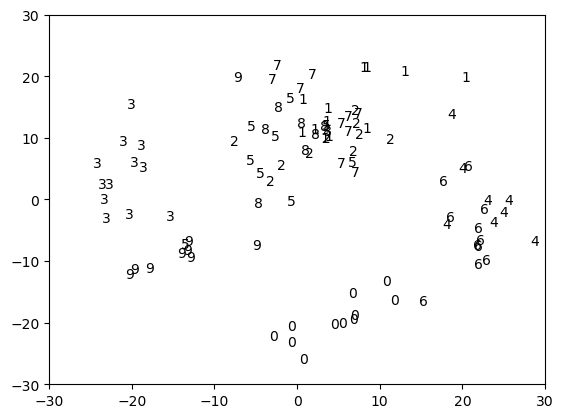

In [50]:
#créer une figure
plt.figure()

#définir les limites de l'axe des x (axe des abscisses)
#toutes les valeurs en dehors de cet intervalle ne seront pas affichées sur le graphe
plt.xlim(-30, 30)

#définir les limites de l'axe des y (axe des ordonnées)
#toutes les valeurs en dehors de cet intervalle ne seront pas affichées sur le graphe
plt.ylim(-30, 30)

#la boucle for itère 100 fois, ce qui indique que vous souhaitez ajouter 100 éléments de texte au graphique
#X_pca[i,0] et X_pca[i,1] correspondent aux coordonnées des points après la PCA
#chaque point est défini par deux dimensions (composantes principales
#str(y[i]) convertit la valeur correspondante de y en chaîne de caractères pour pouvoir l'afficher sur le graphique
for i in range(100):
    plt.text(X_pca[i,0], X_pca[i,1], str(y[i]))

### Compression des données

In [52]:
#la forme de X
X.shape

(1797, 64)

In [53]:
#définir n_dims
#X.shape[1]: 64 (dimensions/variables)
n_dims = X.shape[1]

#définir model
#n_components=n_dims
model = PCA(n_components=n_dims)

#entraîner le modèle sur les données X
#la métode fit_transform combine la méthode fit() et la méthode transform()
model.fit_transform(X)

array([[-1.25946645e+00, -2.12748835e+01,  9.46305462e+00, ...,
         0.00000000e+00,  3.18831341e-15, -7.09230177e-15],
       [ 7.95761130e+00,  2.07686990e+01, -4.43950604e+00, ...,
         0.00000000e+00, -8.31585767e-16,  7.57880933e-15],
       [ 6.99192297e+00,  9.95598641e+00, -2.95855808e+00, ...,
         0.00000000e+00, -1.06003581e-15,  4.29696449e-15],
       ...,
       [ 1.08012837e+01,  6.96025223e+00, -5.59955453e+00, ...,
         0.00000000e+00, -5.45355867e-15, -2.38083974e-15],
       [-4.87210009e+00, -1.24239536e+01,  1.01708664e+01, ...,
         0.00000000e+00,  1.30056817e-15, -2.12675373e-15],
       [-3.44389631e-01, -6.36554919e+00, -1.07737085e+01, ...,
         0.00000000e+00, -5.32192531e-15,  4.68491897e-15]])

In [54]:
#enregistrer les données X transformées dans la variable X_reduced
X_pca = model.fit_transform(X)

#la forme de X_pca
X_pca.shape

(1797, 64)

In [55]:
#examiner le % de variance préservé par chacune des composantes
model.explained_variance_ratio_

array([1.48905936e-01, 1.36187712e-01, 1.17945938e-01, 8.40997942e-02,
       5.78241466e-02, 4.91691032e-02, 4.31598701e-02, 3.66137258e-02,
       3.35324810e-02, 3.07880621e-02, 2.37234084e-02, 2.27269657e-02,
       1.82186331e-02, 1.77385494e-02, 1.46710109e-02, 1.40971560e-02,
       1.31858920e-02, 1.24813782e-02, 1.01771796e-02, 9.05617439e-03,
       8.89538461e-03, 7.97123157e-03, 7.67493255e-03, 7.22903569e-03,
       6.95888851e-03, 5.96081458e-03, 5.75614688e-03, 5.15157582e-03,
       4.89539777e-03, 4.28887968e-03, 3.73606048e-03, 3.53274223e-03,
       3.36683986e-03, 3.28029851e-03, 3.08320884e-03, 2.93778629e-03,
       2.56588609e-03, 2.27742397e-03, 2.22277922e-03, 2.11430393e-03,
       1.89909062e-03, 1.58652907e-03, 1.51159934e-03, 1.40578764e-03,
       1.16622290e-03, 1.07492521e-03, 9.64053065e-04, 7.74630271e-04,
       5.57211553e-04, 4.04330693e-04, 2.09916327e-04, 8.24797098e-05,
       5.25149980e-05, 5.05243719e-05, 3.29961363e-05, 1.24365445e-05,
      

In [56]:
#chaque valeur représente le % de variance préservé par chaque composante (composante 1, composante 1,...etc: 64 composantes)

In [57]:
#vérifier sa forme
model.explained_variance_ratio_.shape

(64,)

In [58]:
#enregistrer dans une variable appelée variances
variances = model.explained_variance_ratio_

#calculer sa somme cumulée
np.cumsum(variances)

array([0.14890594, 0.28509365, 0.40303959, 0.48713938, 0.54496353,
       0.59413263, 0.6372925 , 0.67390623, 0.70743871, 0.73822677,
       0.76195018, 0.78467714, 0.80289578, 0.82063433, 0.83530534,
       0.84940249, 0.86258838, 0.87506976, 0.88524694, 0.89430312,
       0.9031985 , 0.91116973, 0.91884467, 0.9260737 , 0.93303259,
       0.9389934 , 0.94474955, 0.94990113, 0.95479652, 0.9590854 ,
       0.96282146, 0.96635421, 0.96972105, 0.97300135, 0.97608455,
       0.97902234, 0.98158823, 0.98386565, 0.98608843, 0.98820273,
       0.99010182, 0.99168835, 0.99319995, 0.99460574, 0.99577196,
       0.99684689, 0.99781094, 0.99858557, 0.99914278, 0.99954711,
       0.99975703, 0.99983951, 0.99989203, 0.99994255, 0.99997555,
       0.99998798, 0.99999503, 0.99999804, 0.99999911, 0.99999966,
       1.        , 1.        , 1.        , 1.        ])

In [59]:
#on va de 14% jusqu'à 100%
#ce qu'on cherche à faire c'est trouver le moment où on atteint dans le tableau 95% ou 99% (de variance originelle préservé)
#le choix 95% ou 99% dépend de la personne et du compromis recherché entre réduire au max le dataset et garder un max d'informations

Text(0, 0.5, '% de variance préservé')

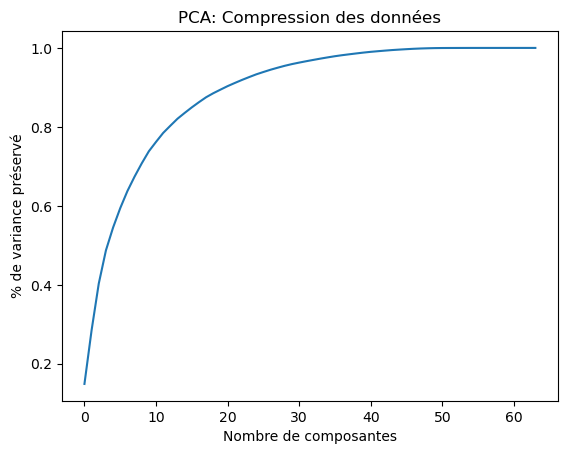

In [60]:
#tracer le graphe
plt.plot(np.cumsum(variances))

plt.title('PCA: Compression des données')       #titre du graphe
plt.xlabel("Nombre de composantes")             #l'axe x (l'axe des abscisses)
plt.ylabel("% de variance préservé")            #l'axe y (l'axe des ordonnées)

In [61]:
#on voit que depuis 40 on a une préservation de 99%

In [62]:
#définir meilleur_dims
meilleur_dims = np.argmax(np.cumsum(variances) > 0.99)

#afficher meilleur_dims
meilleur_dims

40

In [63]:
#on obtient le même résultat:
#càd qu'à partie de la 40ème composante que l'on atteint 99% de la variance du modèle

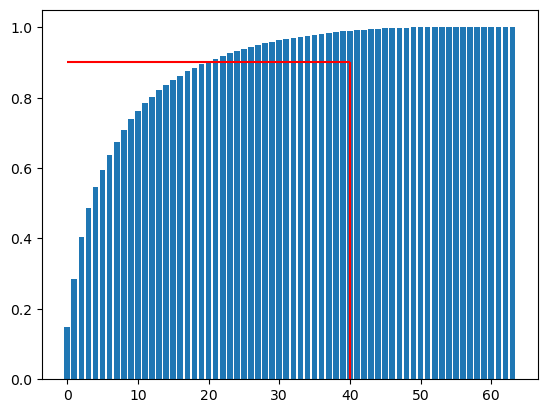

In [64]:
#tracer np.cumsum(variances) en fonction de range(n_dims)
#plt.bar(): crée un diagramme à barres
#range(n_dims): génère une liste de valeurs de 0 à n_dims - 1,
#n_dims est le nombre de dimensions (le nombre de composantes principales dans l'analyse en composantes principales)
plt.bar(range(n_dims), np.cumsum(variances))

#plt.hlines(): trace des lignes horizontales sur le graphique
#0.90: spécifie la position verticale de la ligne, càd qu'on aura une ligne à cette hauteur pour indiquer un seuil
#ici 90% de variance préservée
#0 et meilleur_dims: définissent l'intervalle horizontal de la ligne
#La ligne s'étendra de x = 0 à x = meilleur_dims
#colors='r': couleur de la ligne horizontale en rouge
plt.hlines(0.90, 0, meilleur_dims, colors='r')

#plt.hlines(): trace des lignes verticales sur le graphique
#meilleur_dims: détermine la position horizontale de la ligne
#0 et 0.90: définissent l'intervalle vertical de la ligne
#La ligne s'étendra de x = 0 à y = 0.90
#colors='r': couleur de la ligne verticale en rouge
plt.vlines(meilleur_dims, 0, 0.90, colors='r')

In [65]:
#réentraîner le modèle
# avec n_components= 40
model = PCA(n_components=40)

#entraîner le modèle sur les données X
#la métode fit_transform combine la méthode fit() et la méthode transform()
model.fit_transform(X)

#enregistrer les données X transformées dans la variable X_reduced
X_pca = model.fit_transform(X)

#la forme de X_pca
X_pca.shape

(1797, 40)

In [66]:
#maintenant on est sûr d'avoir réduit la dimension à la meilleure valeur tout en gardant 99% de les informations du dataset

In [67]:
#si on veut observer à quoi ressemble ces images après leur compression, on les décompresse (pr avoir 64 pixels)
#attention: celà ne remet pas les données à leur position d'origine
model.inverse_transform(X_pca)

#enregistrer dans la variable X_pca_inverse
X_pca_inverse = model.inverse_transform(X_pca)

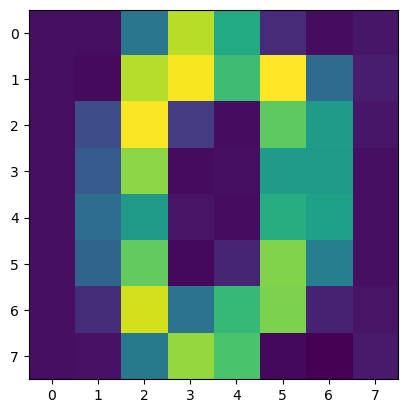

In [68]:
#afficher la 1ère image des images de X_pca_inverse avec matplotlib
#reshape((8,8)): redimensioner l'image pour avoir 8 pixels en hauteur et 8 pixels en largeur
plt.imshow(X_pca_inverse[0].reshape((8,8)))

In [69]:
#on voit que PCA(n_components=40) a bien conservé les informations du dataset

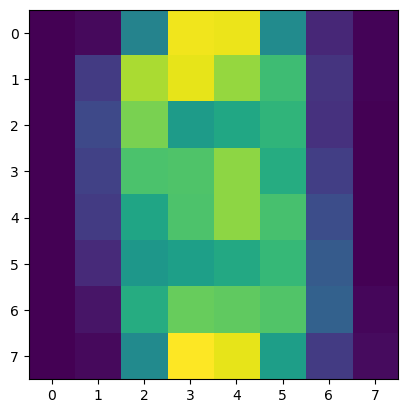

In [70]:
#si on applique PCA(n_components=1)

#réentraîner le modèle
# avec n_components= 1
model = PCA(n_components=1)

#entraîner le modèle sur les données X
#la métode fit_transform combine la méthode fit() et la méthode transform()
model.fit_transform(X)

#enregistrer les données X transformées dans la variable X_reduced
X_pca = model.fit_transform(X)

#transformation inverse
model.inverse_transform(X_pca)

#enregistrer dans la variable X_pca_inverse
X_pca_inverse = model.inverse_transform(X_pca)

#afficher la 1ère image des images de X_pca_inverse avec matplotlib
#reshape((8,8)): redimensioner l'image pour avoir 8 pixels en hauteur et 8 pixels en largeur
plt.imshow(X_pca_inverse[0].reshape((8,8)))

In [71]:
#en regardant ici la même image que tout à l'heure, on voit bien cette fois-ci que l'image a été mal-compressée
#tou a été compressé en 1 seule dimension
#c'est pourquoi on obtient un résultat comme celui-ci
#plus on augmente la valeur de n_components (càd le nbre de composantes) dans PCA, plus le % de la variance qui est préservé augmente

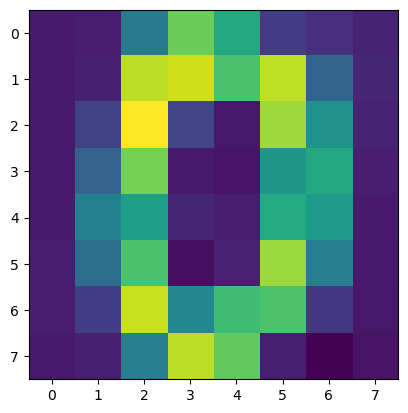

In [72]:
#on peut aussi définir le % de variance préservée
#on applique PCA(n_components=0.95) pour 95% de variance préservée

#réentraîner le modèle
# avec n_components= 0.95
model = PCA(n_components=0.95)

#entraîner le modèle sur les données X
#la métode fit_transform combine la méthode fit() et la méthode transform()
model.fit_transform(X)

#enregistrer les données X transformées dans la variable X_reduced
X_pca = model.fit_transform(X)

#transformation inverse
model.inverse_transform(X_pca)

#enregistrer dans la variable X_pca_inverse
X_pca_inverse = model.inverse_transform(X_pca)

#afficher la 1ère image des images de X_pca_inverse avec matplotlib
#reshape((8,8)): redimensioner l'image pour avoir 8 pixels en hauteur et 8 pixels en largeur
plt.imshow(X_pca_inverse[0].reshape((8,8)))

In [73]:
#pour savoir le nombre de composantes utilisées pour avoir 95% de variance préservée
model.n_components_

29

In [74]:
#29 composantes sont nécessaires pour avoir 95% de variance préservée

Text(0.5, 1.0, 'Compressé')

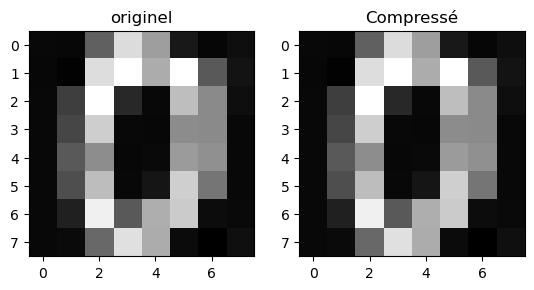

In [75]:
#on peut aussi définir le % de variance préservée
#on applique PCA(n_components=0.99) pour 99% de variance préservée

#réentraîner le modèle
# avec n_components= 0.99
model = PCA(n_components=0.99)

#entraîner le modèle sur les données X
#la métode fit_transform combine la méthode fit() et la méthode transform()
model.fit_transform(X)

#enregistrer les données X transformées dans la variable X_reduced
X_pca = model.fit_transform(X)

#transformation inverse
model.inverse_transform(X_pca)

#enregistrer dans la variable X_pca_inverse
X_pca_inverse = model.inverse_transform(X_pca)

#créer un subplot:

#1er graphique
plt.subplot(1, 2, 1)

#afficher la 1ère image des images de X_pca_inverse avec matplotlib
#reshape((8,8)): redimensioner l'image pour avoir 8 pixels en hauteur et 8 pixels en largeur
#cmap='gray': couleur grise
plt.imshow(X_pca_inverse[0].reshape((8,8)), cmap='gray')

#définir le titre du 1er graphe
plt.title('originel')

#2ème graphique
plt.subplot(1, 2, 2)

#afficher la 1ère image des images de X_pca_inverse avec matplotlib
#reshape((8,8)): redimensioner l'image pour avoir 8 pixels en hauteur et 8 pixels en largeur
#cmap='gray': couleur grise
plt.imshow(X_pca_inverse[0].reshape((8,8)), cmap='gray')

#définir le titre du 2ème graphe
plt.title('Compressé')

**Des points importants à connaître lors de l'utilisation de PCA:**

1. **Il faut standardiser les données avant d'utiliser PCA (avec StandardScaler).** Il est impostant que les données soient centrées et avoir une variance = 1 ce qui facilite beaucoup la projection des données.
2. **PCA est normalement conçu pour les variables continues.**
3. **PCA n'est pas efficace dans sur les datasets non linéaires.** Dans ce cas on utilise les techniques de Manifold Learning: IsoMap ou T-SNE.